<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [723]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [724]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from selenium import webdriver

In [725]:

path = '/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-3/Indeed_html.rtf'

with open(path) as f:
    html = f.read()

soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

{\rtf1\ansi\ansicpg1252\cocoartf2639
\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\fswiss\fcharset0 Helvetica;}
{\colortbl;\red255\green255\blue255;}
{\*\expandedcolortbl;;}
\paperw11900\paperh16840\margl1440\margr1440\vieww11520\viewh8400\viewkind0
\pard\tx720\tx1440\tx2160\tx2880\tx3600\tx4320\tx5040\tx5760\tx6480\tx7200\tx7920\tx8640\pardirnatural\partightenfactor0

\f0\fs24 \cf0
<!DOCTYPE html>
\
<html dir="ltr" lang="en">
 \
 <head>
  \
  <link href="/images/favicon.ico" rel="shortcut icon"/>
  \
  <title>
   Data Scientist $20,000 Jobs, Employment in New York State | Indeed.com
  </title>
  \
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  \
  <meta content="809 Data Scientist $20,000 jobs available in New York State on Indeed.com. Apply to Data Scientist, Senior Data Analyst, Senior Data Scientist and more!" name="description"/>
  \
  <meta content="Data Scientist $20,000 Jobs, Employment in New York State, New York State careers, New York State employme

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [726]:
# location
def get_location(card):
    # getting location text
    try:
        location = card.find(class_ = "companyLocation").text
    except:
        location = np.nan
        
    # cleaning location text
    pattern = re.compile(r'[^\W.]+',flags=re.MULTILINE)
    location = re.findall(pattern, location)
    location_cleaned = ''
    for i in location:
        location_cleaned = location_cleaned + i + ' '
    
    return location_cleaned
    

In [727]:
# titles
def get_title(card):
    title = card.find(class_ = "jobTitle")
    pattern = re.compile(r'[^\W.]+',flags=re.MULTILINE)
    title = re.findall(pattern, title.text)
    cleaned = ''
    for i in title:
        cleaned = cleaned + i + ' '
    return cleaned

In [728]:
# companies

def get_company(card):
    company = card.find(class_ = "companyName")
    pattern = re.compile(r'[^\W.]+',flags=re.MULTILINE)
    company = re.findall(pattern, company.text)
    cleaned = ''
    for i in company:
        cleaned = cleaned + i + ' '
    return cleaned

In [729]:
# salaries
def get_salary(card):
    # get employer listed salary
    try:
        salary = card.find(class_ = 'salary-snippet-container').text
        estimated = 0
        
    # get Indeed's estimated salary
    except:
        try:
            salary = card.find(class_ = 'estimated-salary').text
            estimated = 1  
        # no salary info
        except:
            salary = np.nan
            estimated = np.nan
    
    if salary != np.nan:
        if estimated == 0:
            salary = salary.replace(',','')
            pattern = re.compile(r'[\d]+',flags=re.MULTILINE)
            salary = re.findall(pattern, salary)
            salary = np.mean([int(i) for i in salary[0:2]])
        elif estimated == 1:
            salary = np.nan
            
            # TO DO - work out how to get a clean version of estimated salary
            
#             salary = salary.replace(',','')
#             pattern = re.compile(r'([\d]+)|(([\d]+)(\.([0-9]+)))',flags=re.MULTILINE)
#             salary = re.findall(pattern, salary)
#             salary = salary[1:3]
#             for el in range(len(salary)):
                
     
    
    return salary, estimated

In [730]:
# company rating
def get_company_rating(card):
    try:
        rating = card.find(class_='ratingNumber').text
        pattern = re.compile(r'(([\d]+)(\.([0-9]+)))',flags=re.MULTILINE)
        rating = re.findall(pattern, rating)
        rating = float(rating[0][0])
    except:
        rating = np.nan
    
    return rating

In [731]:
# multiple candidates
def get_multiple_candidates(card):
    try:
        multiple = card.find(class_='hiringMultipleCandidatesCaption').text
        multiple = 1
    except:
        multiple = 0
        
    return multiple

In [732]:
# number of listings per search
def get_n_jobs(soup):
    n_jobs = soup.find(class_="jobsearch-JobCountAndSortPane-jobCount").text
    pattern = re.compile(r'([\d]+)',flags=re.MULTILINE)
    n_jobs = int(re.findall(pattern, n_jobs)[0])
    return n_jobs

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [733]:
"""url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 5000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = pd.DataFrame(columns = ['title','company','company_rating','location','salary_amount','salary_estimated','multiple_candidates'])

# launching Chrome
dr = webdriver.Chrome()

for city in set(['Atlanta', 'Austin', 'Boston', 'Chicago', 'Colorado',
                 'Dallas', 'Denver', 'Detroit', 'Houston', 'Los+Angeles',
                 'Menlo+Park', 'Miami', 'New+York', 'Palo+Alto', 'Philadelphia',
                 'Phoenix', 'Pittsburgh', 'Portland', 'San+Diego', 'San+Francisco',
                 'San+Jose', 'Seattle', 'Washington', 'Ontario', 'Florida',
                 'Minneapolis', 'St+Louis', 'Baltimore', 'Orlando', 'Kansas',
                 'Nashville', 'Oklahoma', 'New+Orleans']):
    
    for role in set(['data+analyst', 'research+scientist', 'business+intelligence',
                     'machine+learning', 'data+engineer', 'statistician',
                     'data+consultant', 'cloud+engineer', 'natural+language+processing',
                     'quantitative+researcher']):      
        
        for start in range(0, max_results_per_city, 10):
            URL = f"http://www.indeed.com/jobs?q={role}&l={city}&sc=0kf%3Ajt%28fulltime%29%3B&start={start}"

            # checking for 404
            r = requests.get(URL)
            if r.status_code == 404:
                # if 404, skip next steps
                time.sleep(1)
                continue
                    
            # going to the URL
            dr.get(URL)

            # getting the html 
            html = dr.page_source

            soup = BeautifulSoup(html, 'html.parser')
            
            # exiting loop if all listings have already been scraped
            try:
                n_jobs = get_n_jobs(soup)
                if start > n_jobs:
                    break
            except:
                break

            # getting data from a page
            page_df = pd.DataFrame(columns = ['title','company','company_rating','location_scraped','location_searched','salary_amount','salary_estimated','multiple_candidates'])
            
            try:
                # getting cards
                cards = soup.find_all(class_="cardOutline")

                # loop over the cards, extracting the info in each card, combine into a row for page_df
                for card in range(len(cards)):
                    record = [get_title(cards[card]),
                              get_company(cards[card]),
                              get_company_rating(cards[card]),
                              get_location(cards[card]),
                              city,
                              get_salary(cards[card])[0],
                              get_salary(cards[card])[1],
                              get_multiple_candidates(cards[card])
                             ]
                    page_df.loc[len(page_df.index)] = record

                page_df['salary_estimated'] = page_df['salary_estimated'].astype(float)
                page_df['multiple_candidates'] = page_df['multiple_candidates'].astype(float)

                # Append to the full set of results
                results = pd.concat([results, page_df])
            except:
                time.sleep(1)
                continue
            time.sleep(3)
    results.to_csv('/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-4_manual/scrape_results.csv')
# closing chrome    
dr.quit()"""

'url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"\nmax_results_per_city = 5000 # Set this to a high-value (5000) to generate more results. \n# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.\n\nresults = pd.DataFrame(columns = [\'title\',\'company\',\'company_rating\',\'location\',\'salary_amount\',\'salary_estimated\',\'multiple_candidates\'])\n\n# launching Chrome\ndr = webdriver.Chrome()\n\nfor city in set([\'Atlanta\', \'Austin\', \'Boston\', \'Chicago\', \'Colorado\',\n                 \'Dallas\', \'Denver\', \'Detroit\', \'Houston\', \'Los+Angeles\',\n                 \'Menlo+Park\', \'Miami\', \'New+York\', \'Palo+Alto\', \'Philadelphia\',\n                 \'Phoenix\', \'Pittsburgh\', \'Portland\', \'San+Diego\', \'San+Francisco\',\n                 \'San+Jose\', \'Seattle\', \'Washington\', \'Ontario\', \'Florida\',\n                 \'Minneapolis\', \'St+Louis\', \'Balt

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

In [734]:
results = pd.read_csv('/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-4_manual/scrape_results.csv')

In [735]:
results.head()

,Unnamed: 0,title,company,company_rating,location,salary_amount,salary_estimated,multiple_candidates,location_scraped,location_searched
0,0,Human Resources Analyst,Inland Empire Utilities Agency,4.2,NaN,109915.0,0.0,0.0,Hybrid remote in Chino CA 91708,Ontario
1,1,Communications Consultant IV,Kaiser Permanente,4.1,NaN,NaN,1.0,0.0,Rancho Cucamonga CA 91730,Ontario
2,2,Consultant,Kaiser Permanente,4.1,NaN,NaN,1.0,0.0,Fontana CA,Ontario
3,3,Data Reporting and Analytics Consultant III,Kaiser Permanente,4.1,NaN,NaN,1.0,0.0,Riverside CA,Ontario
4,4,Sustainability Consultant,AECOM,3.7,NaN,NaN,1.0,0.0,Hybrid remote in Orange CA 92868,Ontario


In [736]:
# removing unwanted columns
results.drop(columns=['Unnamed: 0','location', 'salary_estimated'], inplace= True)

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [737]:
# dropping records with no salary amount info
results = results[results['salary_amount'].notna()]
results.shape

(26694, 7)

In [738]:
# my scrapping functions were set up to do only get yearly salaries, so this is partly
# done already. However, I'll also drop records with salary amount less than 20,000 
# incase any non-fulltime roles got picked up
results = results[results['salary_amount']>= 20000]
results.shape

(20907, 7)

In [739]:
# dropping any duplicate rows. n.b. location_scrapped has to be set aside during 
# drop_duplicates to prevent indentical jobs that have shown up in multiple location searches 
# being treated as distinct. I've used the version with location_scrapped set aside to 
# index back into the original DataFrame where the column is maintined.
results = results.loc[results[results.columns[:-1]].drop_duplicates().index]
results.shape

(6295, 7)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [740]:
## my get_salary function has already done this.

Handling missing values.

In [741]:
# a third of the companies have no rating. 
results['company_rating'].isna().sum()/len(results)

0.3307386814932486

In [742]:
# there are no other missing values
results.isna().sum()

title                     0
company                   0
company_rating         2082
salary_amount             0
multiple_candidates       0
location_scraped          0
location_searched         0
dtype: int64

In [743]:
results['company_rating'] = results['company_rating'].fillna(results['company_rating'].median())

In [744]:
results.reset_index(inplace = True)
results.drop(columns = 'index', inplace = True)
results.columns

Index(['title', 'company', 'company_rating', 'salary_amount',
       'multiple_candidates', 'location_scraped', 'location_searched'],
      dtype='object')

**Exporatory Data Analysis**

In [745]:
results.dtypes

title                   object
company                 object
company_rating         float64
salary_amount          float64
multiple_candidates    float64
location_scraped        object
location_searched       object
dtype: object

In [746]:
# the majority (~70%) of the job titles are unique. These will need to be processed (done later 
# to fit irginal notebook layout)
len(results['title'].unique())/len(results)

0.7094519459888801

0.45639396346306593 

78 



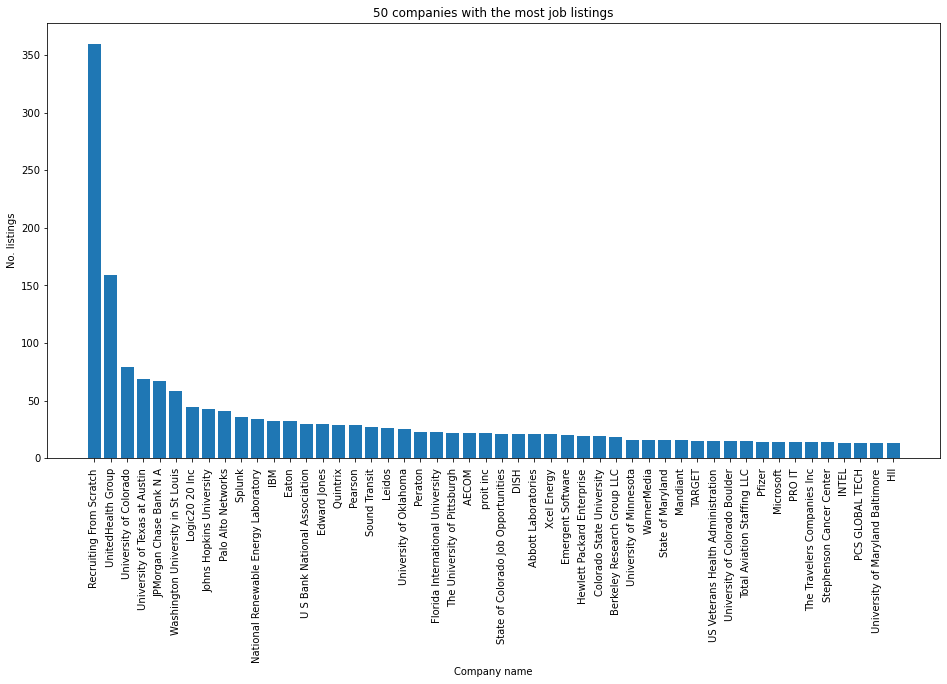

In [747]:
# almost half (~45%) of the company names are unique. These will also need to be processed.
print(len(results['company'].value_counts())/len(results),'\n')

# only 78 have companies have 10 or more listings
print(np.sum(results['company'].value_counts()>=10),'\n')

# the 50 companies with the most listings are...
most_listings = results['company'].value_counts().sort_values(ascending = False).head(50)

fig, ax = plt.subplots(figsize = [16,8])
plt.bar(most_listings.index, most_listings);
plt.xticks(rotation = 90);
plt.title('50 companies with the most job listings');
plt.xlabel('Company name');
plt.ylabel('No. listings');

0.38220810166799046
85


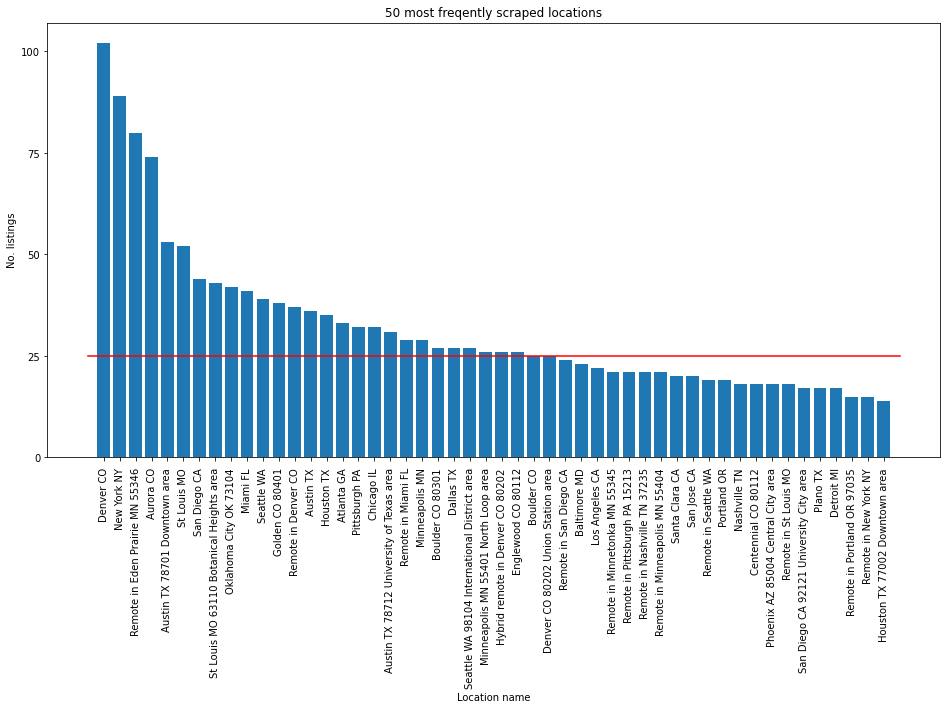

In [748]:
# slightly more than a 3rd (~38%) of the scraped location names are unique
print(len(results['location_scraped'].unique())/len(results))

# only 85 scraped locations appeared 10 or more times
print(np.sum(results['location_scraped'].value_counts()>=10))

# the 50 most commonly scraped location names are...
most_locations = results['location_scraped'].value_counts().sort_values(ascending = False).head(50)

fig, ax = plt.subplots(figsize = [16,8])
plt.bar(most_locations.index, most_locations);
plt.xticks(rotation = 90);
plt.title('50 most freqently scraped locations');
plt.xlabel('Location name');
plt.ylabel('No. listings');
plt.yticks(range(0,125,25));
plt.plot([-1,50],[25,25],c='r')

The above bar graph shows the frequency with which the 50 most common locations appeared in the dataset. The red line is the threshold for 25 listings, indicating that the vast majority of unique locations appear fewer than 25 times in the data (there are a furhter 2356 unique scraped locations with too few listings to appear on the graph). 
Futhermore, several the most common unique locations (e.g. 'Denver CO', 'New York NY') are simply variations on the search terms used. Given this, it may be best to use the searched location names rather than the scraped ones and instead process the scraped ones to full out features such as whether the job is remote. 


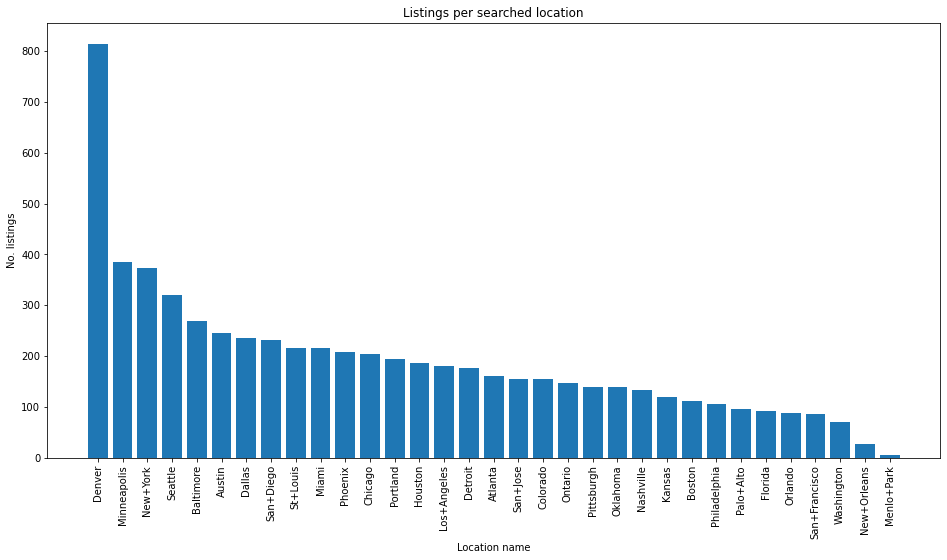

In [749]:
# the searched locations which returned the most results are...
most_locations = results['location_searched'].value_counts().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = [16,8])
plt.bar(most_locations.index, most_locations);
plt.xticks(rotation = 90);
plt.title('Listings per searched location');
plt.xlabel('Location name');
plt.ylabel('No. listings');


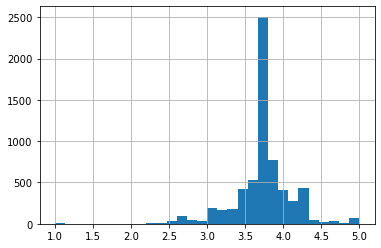

In [750]:
results['company_rating'].hist(bins = 30);

The company rating variable is roughly normally distributed around 3.75. The large column in the centre is due to the missing values which have been imputed with the median. Some of the lower records (i.e. those < 2.5) could be considered outliers. However, given that this variable is measured on a finite scale/range and that they are within that range, I do not think that it is necessary to remove them.

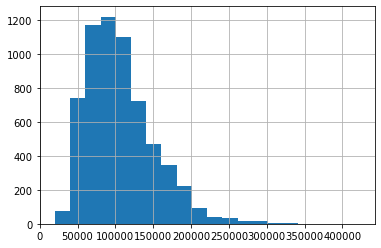

In [751]:
results['salary_amount'].hist(bins = 20);

Salary amount is has a postive/right skew, which is to be expected of salary data. Given this skewness, it will be important to use the median, rather than the mean, as the middle point when converting salary amount into a binary (high/low) variable. The right tail is not long enough to call for outlier removal.

In [752]:
# getting the proportion of jobs recruiting multiple candidates
results['multiple_candidates'].value_counts(normalize = True)

0.0    0.872756
1.0    0.127244
Name: multiple_candidates, dtype: float64

### Save your results as a CSV

In [753]:
results.to_csv('/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-4_manual/scrape_results_cleaned.csv')

### Load in the the data of scraped salaries

In [754]:
results = pd.read_csv('/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-4_manual/scrape_results_cleaned.csv')

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [755]:
## YOUR CODE HERE
median_salary = results['salary_amount'].median()
results['high_salary'] = [1 if i > median_salary else 0 for i in results['salary_amount']]
results

,Unnamed: 0,title,company,company_rating,salary_amount,multiple_candidates,location_scraped,location_searched,high_salary
0,0,Human Resources Analyst,Inland Empire Utilities Agency,4.2,109915.0,0.0,Hybrid remote in Chino CA 91708,Ontario,1
1,1,Organizational Consultant 3 Patient Experience...,UC Irvine Health,3.8,100000.0,0.0,Orange CA,Ontario,0
2,2,Inventory Integrity Quality Manager Riverside CA,Nordstrom Inc,3.8,116000.0,0.0,Riverside CA,Ontario,1
3,3,Assistant Air Quality Specialist Economist,South Coast Air Quality Management District,3.8,91369.0,0.0,Diamond Bar CA 91765,Ontario,0
4,4,Planning Programming Specialist,Riverside Transit Agency,3.5,90818.0,0.0,Riverside CA Hunter Industrial Park area,Ontario,0
...,...,...,...,...,...,...,...,...,...
6290,6290,Business Analyst I II,County of Grant Public Utility District2,3.7,62400.0,0.0,Ephrata WA 98823,Washington,0
6291,6291,Licensed Behavior Analysts Licensed Assistant ...,Focused Behavior Solutions LLC,3.7,70000.0,0.0,Walla Walla WA 99362,Washington,0
6292,6292,Business Intelligence Solution Architect,Gainwell Technologies LLC,2.7,115450.0,0.0,Remote in Washington State,Washington,1
6293,6293,Cloud Data Analyst,Washington Technology Solutions,3.4,92562.0,0.0,Olympia WA,Washington,0


#### Thought experiment: What is the baseline accuracy for this model?

As the target is derived by splitting the salary amount on the median, half the target labels are above the median and the rest are equal to or below the median. As such the baseline accuracy should be at or near 50%, depending upon whether any values are situated on the median. In practice, the baseline accuracy for my data is 50.8975%.

In [756]:
results['high_salary'].value_counts(normalize=True)

0    0.508975
1    0.491025
Name: high_salary, dtype: float64

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.

In [757]:
# creating train and test sets using only location as a feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

# dummifying location
location_dummies = pd.get_dummies(results['location_searched'])

# scaling location, creating X and y
X = pd.DataFrame(sscaler.fit_transform(location_dummies), columns = location_dummies.columns)
y = results['high_salary']

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

"""I've just realised that I have standardised the data before splitting it into train and test sets.
I would change this, but it may change the outputs of my models, about which I've already written summaries.
Unfortunately I don't have time to update those, so I'll leave them as is. Fortunately, I think that, given
that the only predictor variables are a single dummified variable, scaling shouldn't be too important and so
the data leakage is less of an issue than it might be in other circumstances.e"""

In [758]:
# importing models to try
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**Model 1 - logistic regrssion**

The logistic regressor (below) with built-in parameters trained only on location performs fairly poorly. Its accuracy is 56%, which is close to the baseline accuracy. Its precision and recall are marginally larger for low-salary jobs (labelled 0) than for high-salary jobs (labelled 1). This indicates that when it predicts 'low-salary' it is more likely to be correct than if it predicts 'high-salary' and that a greater proportion of the low-salary instances were correctly labelled than the high-salary instances. However as the differences in the model's precision and recall on either label are relatively small, the model's f1 score are similar in scale to those scores.

The plot shows the coefficients for the logistic regressor. Each coefficient is the expected change in the log odds of a job being high-salary associated with the job being at that particular location. Despite the model's poor accuracy, the coefficients make intuitive sense; locations with notable tech industries have larger positive coefficients, whereas those not known for having tech industries (and less wealth overall) have larger negative coefficients.

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       649
           1       0.55      0.51      0.53       610

    accuracy                           0.56      1259
   macro avg       0.56      0.56      0.56      1259
weighted avg       0.56      0.56      0.56      1259



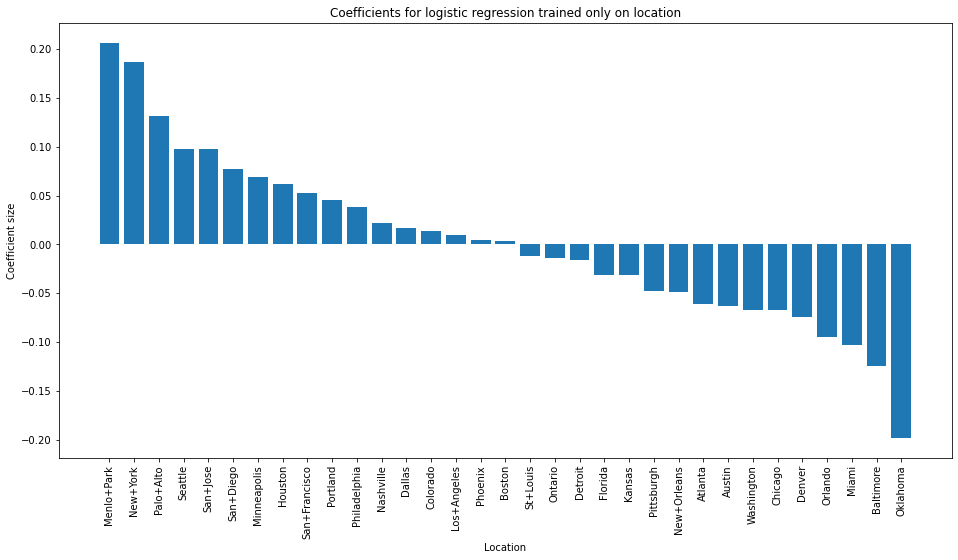

In [759]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# getting performance
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting coefficients
log_reg_location_coefs = pd.Series(data = log_reg.coef_[0], index=location_dummies.columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=[16,8])
plt.bar(log_reg_location_coefs.index, log_reg_location_coefs);
plt.xticks(rotation = 90);
plt.title('Coefficients for logistic regression trained only on location');
plt.xlabel('Location');
plt.ylabel('Coefficient size');


**Model 2 - KNN**

The KNN model with built-in parameters trained only on location performs even worse than the logistic regressor. In fact, it's accuracy (52%) is so close to the baseline accuracy that the model seems not to have learnt any useful information from the location predictors. The higher recall score for low-salary than high-salary instances indicates that the model correctly identified a larger proportion of the low-salary instances. However beyond this, the model's precision and recall scores tell us very little, as it appears to essentially be guessing.

In [760]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# getting performance
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       649
           1       0.50      0.32      0.39       610

    accuracy                           0.52      1259
   macro avg       0.51      0.51      0.49      1259
weighted avg       0.51      0.52      0.50      1259



**Model 3 - decision tree classifier**

The performance of the decision tree is (in terms the classification report output) practically identical to that of the logistic regression. Although this level of similarity is slightly strange, the feature importances can shed some light on why this has occured. Specifically, the features given the highest importances (e.g. New York, Oaklahoma) are those which the logistic regressor learnt the largest (absolute) coefficients for. 

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       649
           1       0.55      0.51      0.53       610

    accuracy                           0.56      1259
   macro avg       0.56      0.56      0.56      1259
weighted avg       0.56      0.56      0.56      1259



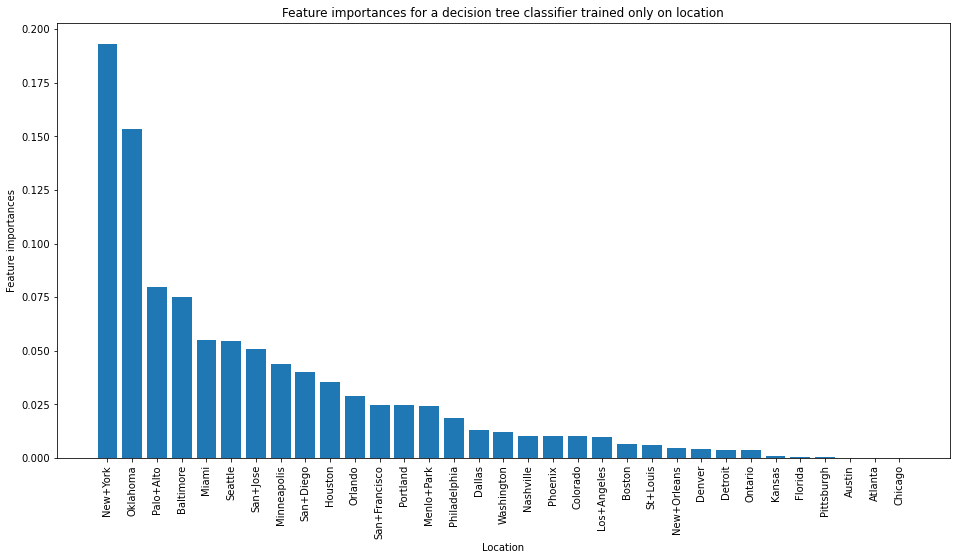

In [761]:
tree_classif = DecisionTreeClassifier()
tree_classif.fit(X_train, y_train)

# getting performance
y_pred = tree_classif.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting feature importances
tree_classif_feat_import_ = pd.Series(data = tree_classif.feature_importances_, index=location_dummies.columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=[16,8])
plt.bar(tree_classif_feat_import_.index, tree_classif_feat_import_);
plt.xticks(rotation = 90);
plt.title('Feature importances for a decision tree classifier trained only on location');
plt.xlabel('Location');
plt.ylabel('Feature importances');

**Model 4 - random forest classifier**

In terms of performance, the random forest classifier is very similar to the logistic regressor and the decision tree (in fact, they all have the same accuracy). However, the random forest classifier differs from the decision tree in the levels of importance that it assigns to the features. Although the rank order of feature importances is similar between the two models, the random forest assigns slightly less importance to the most important features and slightly more importance to the less important features than the decision tree. This is likely due to the fact that the decision trees that make up a random forest undersample features, forcing each tree to rely on the features it has, rather than the most informative.

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       649
           1       0.56      0.53      0.54       610

    accuracy                           0.57      1259
   macro avg       0.57      0.57      0.57      1259
weighted avg       0.57      0.57      0.57      1259



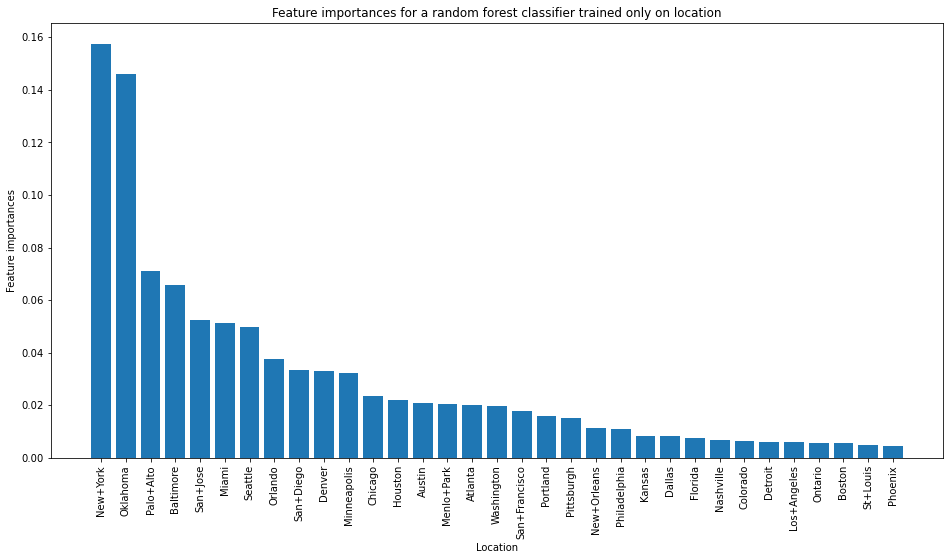

In [762]:
forest_classif = RandomForestClassifier()
forest_classif.fit(X_train, y_train)

# getting performance
y_pred = forest_classif.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting feature importances
forest_classif_feat_import_ = pd.Series(data = forest_classif.feature_importances_, index=location_dummies.columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=[16,8])
plt.bar(forest_classif_feat_import_.index, forest_classif_feat_import_);
plt.xticks(rotation = 90);
plt.title('Feature importances for a random forest classifier trained only on location');
plt.xlabel('Location');
plt.ylabel('Feature importances');

- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.

In [763]:
# building X and y sets with new features
X = results.drop(columns = ['high_salary','salary_amount'])
y = results['high_salary']


In [764]:
# creating new variables indicating words used in the job title

from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(token_pattern='\w+', stop_words='english')
cvec.fit(results['title'])
df = pd.DataFrame(cvec.transform(results['title']).toarray(),
                  columns=['title_'+i for i in cvec.get_feature_names()])

# n.b. I'm only taking words which appear in 10+ job titles as fewer than 10 are unlikely to be useful and I
# would like to reduce the number of new features
title_cvec = df[[i for i in [i for i in df.sum()[df.sum()>=10].index if not i[6:].isnumeric()] if len(i) > 1]]

# dropping title from x, adding title cvec
X.drop(columns='title', inplace=True)
X = X.join(title_cvec)

# inspecting
X.head()

,Unnamed: 0,company,company_rating,multiple_candidates,location_scraped,location_searched,title_3d,title_account,title_accountant,title_accounting,...,title_vehicles,title_vice,title_virtual,title_visualization,title_vp,title_warehouse,title_water,title_web,title_work,title_writer
0,0,Inland Empire Utilities Agency,4.2,0.0,Hybrid remote in Chino CA 91708,Ontario,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,UC Irvine Health,3.8,0.0,Orange CA,Ontario,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Nordstrom Inc,3.8,0.0,Riverside CA,Ontario,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,South Coast Air Quality Management District,3.8,0.0,Diamond Bar CA 91765,Ontario,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Riverside Transit Agency,3.5,0.0,Riverside CA Hunter Industrial Park area,Ontario,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [767]:
# creating new variables indicating words used in company name

cvec = CountVectorizer(token_pattern='\w+', stop_words='english')
cvec.fit(results['company'])
df = pd.DataFrame(cvec.transform(results['company']).toarray(),
                  columns=['company_'+i for i in cvec.get_feature_names()])

# n.b. I'm only taking words which appear in 10+ job titles as fewer than 10 are unlikely to be useful and I
# would like to reduce the number of new features
company_cvec = df[[i for i in [i for i in df.sum()[df.sum()>=10].index if not i[8:].isnumeric()] if len(i) > 1]]

# dropping title from x, adding title cvec
X.drop(columns='company', inplace=True)
X = X.join(company_cvec)

# inspecting
X.head()

,Unnamed: 0,company_rating,multiple_candidates,location_scraped,location_searched,title_3d,title_account,title_accountant,title_accounting,title_acquisition,...,company_valley,company_veterans,company_warnermedia,company_washington,company_water,company_west,company_xcel,company_york,company_zeiders,company_zm
0,0,4.2,0.0,Hybrid remote in Chino CA 91708,Ontario,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.8,0.0,Orange CA,Ontario,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.8,0.0,Riverside CA,Ontario,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.8,0.0,Diamond Bar CA 91765,Ontario,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3.5,0.0,Riverside CA Hunter Industrial Park area,Ontario,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [621]:
# creating feature indicating if the job is remote work
results['remote_work'] = [1 if 'remote' in i.lower() else 0 for i in results['location_scraped']]
results['remote_work'].value_counts(normalize = True)
results.corr()

,Unnamed: 0,company_rating,salary_amount,multiple_candidates,high_salary,remote
Unnamed: 0,1.000000,-0.001398,-0.008474,-0.012497,-0.022054,-0.050031
company_rating,-0.001398,1.000000,0.019771,-0.108098,0.028496,-0.009815
salary_amount,-0.008474,0.019771,1.000000,-0.018926,0.770150,0.158381
multiple_candidates,-0.012497,-0.108098,-0.018926,1.000000,0.020682,0.027875
high_salary,-0.022054,0.028496,0.770150,0.020682,1.000000,0.163692
remote,-0.050031,-0.009815,0.158381,0.027875,0.163692,1.000000


In [622]:
# creating a feature indicating if the location is downtown 
results['downtown'] = [1 if 'downtown' in i.lower() else 0 for i in results['location_scraped']]
results['downtown'].value_counts(normalize = True)

0    0.968388
1    0.031612
Name: downtown, dtype: float64

In [768]:
# dropping location scraped and searched, adding dummy location variables in
X.drop(columns = ['location_scraped', 'location_searched'],inplace=True)
X = X.join(location_dummies)

In [814]:
# checking no str variables are reminaing
X.drop(columns = 'Unnamed: 0', inplace=True)
len(X.dtypes[X.dtypes == object])

0

In [815]:
# generating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

# standardising X sets
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

- Then build new classification models including also those features. Do they add any value?


Given the extremely poor performance of the KNN and the identical performances of the logistic regressor and the decision tree on the previous task, I will not carry all modles forward for the next steps. Specifically, I will keep the random forest and the logistic regressor. I've selected these due to their differnces in performance and design.

**Model 1 - logistic regression**

The performance of the logistic regressor has improved significantly in terms of both overall accuracy (79%) and both precision and recall for either class (80% each for low salary listings and 79% each for high salary listings. Clearly, the new feature set is much more informative. In fact, the two most informative features in the original model (i.e. those with the largests coefficients, New York and Oaklahoma) do not even appear amongst the new model's 30 largest coefficients. 

The model's 30 largests coefficients are shown on the graph below. There are several title words with large coefficients which are very intuitive (e.g. predicting high salaries; president, senior, director, predicting low salaries; junior, coordinator, administractive). The graph also suggests that amongst all listings, those posted by recruiters are amongst the best paid, whereas those posted by universities are amongst the worst.

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       649
           1       0.79      0.79      0.79       610

    accuracy                           0.79      1259
   macro avg       0.79      0.79      0.79      1259
weighted avg       0.79      0.79      0.79      1259



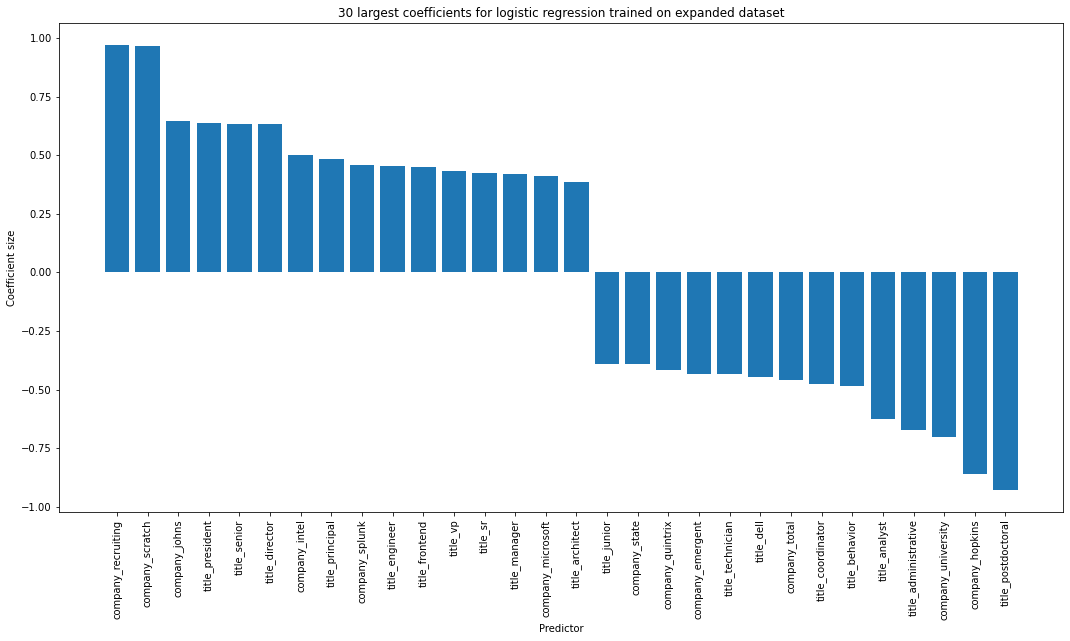

In [826]:
log_reg = LogisticRegression(max_iter = 500)
log_reg.fit(X_train, y_train)

# getting performance
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting coefficients
log_reg_coefs = pd.Series(data = log_reg.coef_[0], index=X.columns).sort_values(ascending = False)
thirty_biggest_coefs = log_reg_coefs.abs().sort_values(ascending=False)[:30]
thirty_biggest_coefs = log_reg_coefs[thirty_biggest_coefs.index].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[18,9])
plt.bar(thirty_biggest_coefs.index, thirty_biggest_coefs);
plt.xticks(rotation = 90);
plt.title('30 largest coefficients for logistic regression trained on expanded dataset');
plt.xlabel('Predictor');
plt.ylabel('Coefficient size');

**Model 2 - random forest classifier**

The performance of the random forest classifier has improved by a similar margin to the logistic regressor. Its accuracy is now at 80% and its precision and recall scores are similat (although it's recall ability is slightly imbalanced between the two classes, favouring low salary roles).

The feature importances bar chart below highlights some similat features as the logistic regressors coefficient char, although it also includes several featrues which were less important to the logistic regressor. Particularly, company rating is the most important predictor for the random forest, despite not being amongst the regressor's top 30 predictors. The feature importances graph also includes some of the location predictors used eariler (specifically; Denver, New York and Seattle), although not in the same order.

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       649
           1       0.80      0.79      0.80       610

    accuracy                           0.80      1259
   macro avg       0.80      0.80      0.80      1259
weighted avg       0.80      0.80      0.80      1259



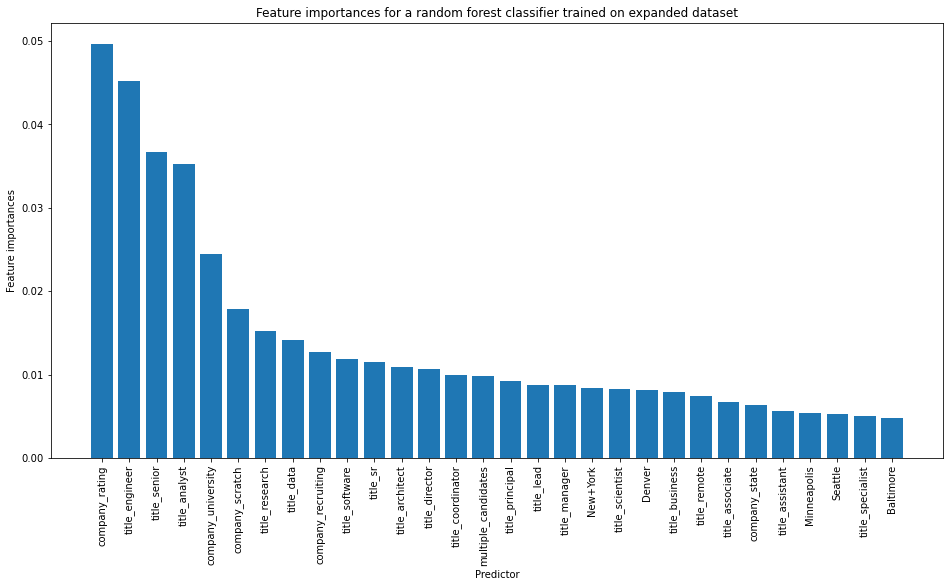

In [834]:
forest_classif = RandomForestClassifier()
forest_classif.fit(X_train, y_train)

# getting performance
y_pred = forest_classif.predict(X_test)
print(classification_report(y_test, y_pred))

# plotting feature importances
forest_classif_feat_import_ = pd.Series(data = forest_classif.feature_importances_, index=X.columns).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=[16,8])
plt.bar(forest_classif_feat_import_.index[:30], forest_classif_feat_import_[:30]);
plt.xticks(rotation = 90);
plt.title('Feature importances for a random forest classifier trained on expanded dataset');
plt.xlabel('Predictor');
plt.ylabel('Feature importances');

- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

**Parameter tuning** 

Below, I have attempted some parameter tuning for both models. Given the large number of input features, I decided to focus on regularizion. Specifically, for the logistic regresssor, I looked at changing the regularization type (i.e. penalty) and varying the regularization amount (i.e. C). The best parameters were and l1 penalty with a C of 1. This has not significantly changed the model's performance. 

For the random forest, I have also focused on regularisation, picking the max_depth and min_samples_leaf parameters for tuning. Grid search found a max_depth of 8 and a min_samples_leaf of 5 to be the optimum values. However, when this model is evaluated on the test set, it's performance is actually worse than the un-tuned model, with its accuracy falling to 75%.

In [837]:
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression(max_iter = 500, solver = 'liblinear')
log_reg_param_grid = {'penalty': ['l1','l2'],
                     'C': range(1,10,2)
                     }

log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid)
log_reg_grid.fit(X_train, y_train)

# getting performance
y_pred = log_reg_grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       649
           1       0.79      0.79      0.79       610

    accuracy                           0.80      1259
   macro avg       0.79      0.79      0.79      1259
weighted avg       0.80      0.80      0.80      1259



In [835]:
log_reg_grid.best_params_

{'C': 1, 'penalty': 'l1'}

In [833]:
forest_classif = RandomForestClassifier()

forest_classif_param_grid = {'max_depth': range(2,10,2),
                            'min_samples_leaf': range(5,20,5)}

forest_classif_grid = GridSearchCV(forest_classif, forest_classif_param_grid)
forest_classif_grid.fit(X_train, y_train)

# getting performance
y_pred = forest_classif_grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       649
           1       0.80      0.65      0.72       610

    accuracy                           0.75      1259
   macro avg       0.76      0.75      0.75      1259
weighted avg       0.76      0.75      0.75      1259



In [836]:
forest_classif_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 5}

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [842]:
from sklearn.model_selection import cross_val_score, cross_val_predict

log_cv_score = cross_val_score(log_reg_grid, X_test, y_test, cv=5)
log_cv_score_mean = np.mean(log_cv_score)

print(log_cv_score)
print(log_cv_score_mean)

[0.75396825 0.69444444 0.69444444 0.71428571 0.7250996 ]
0.7164484917472965


In [844]:
forest_cv_score = cross_val_score(forest_classif_grid, X_test, y_test, cv=5)
forest_cv_score_mean = np.mean(forest_cv_score)

print(forest_cv_score)
print(forest_cv_score_mean)

[0.77380952 0.75       0.74206349 0.77380952 0.69322709]
0.7465819262632012


I've discussed the accuracy, precision, recall and f-1 scores of these models several times above, so wont repeat this here.

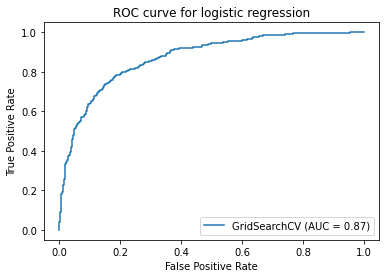

In [857]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg_grid, X_test, y_test);
plt.title('ROC curve for logistic regression');

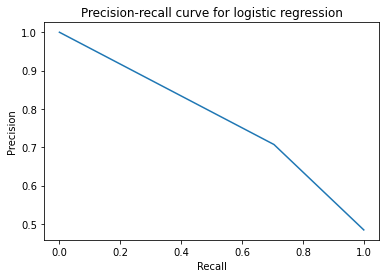

In [856]:
y_pred = cross_val_predict(log_reg_grid, X_test, y_test)

#getting precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision);

#add axis labels to plot
ax.set_title('Precision-recall curve for logistic regression');
ax.set_ylabel('Precision');
ax.set_xlabel('Recall');

One way to adjust a model so that it is less likely to incorrectly predict a high salary job is to take it's estimated class probabilities (e.g. using predict_proba) as a raw output (rather than predicitions) and then covert these into predictions using a manually set threshold. You would adjust the threshold so that the precision of the high salary preicitons is as good as possible. This would allow you to be more confident that you were correct when predicting a job as having a high salary (although it would likely mean that you would label many high salary jobs incorrectly). Unfortunately I've run out of time, so haven't done this.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [624]:
## YOUR CODE HERE

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

The goal of this project was to use job listings form the website indeed.com to determine the industry factors that are most important in predicting salaries for data science roles. The scope of the research was limited to jobs in the USA. I began the project by setting up a webscraper to search for and pull down relevant job listings. The scraped searched over 33 locations and 10 job titles and was limited to only full-time positions. Otherwise all listings were scrapped. The information scraped included; the job title, the location of the job listing, the salary, whether or not the salary was estimated and the company rating. As the scrapper was running, each page of html was processed by a number of functions designed to pull out the relevant information. 

Once the scraper had finished running, I had found about 95,000 listings. After removing duplicates and cleaning the data, about 6250 unique job listings remained. I used the scraped salary amounts to create a new binary target feature, by labelling the salaries above the median as 1 and those equal to or below the median as 0.

Initially, I built 4 models (a logisitc regressor a KNN, a decision tree classifier and a random forest classifier) and trained these exclusively on the searched location of the job listing. The performance of these models was fairly poor, with no model attaining an accuracy above 60 %. Despite this, the regressor's coefficients and the tree and forest models' feature importances matched my expectations, with locations with known tech indutries being some of the most influential predictors.

Next, I created an expanded feature set which included the searched location, company rating, whether or not the job was remote, whether or not the job was at a downtown location, and a number of word count features for the words which most commonly appeared in either the job title or the company name.

I trained both a logistic regressor and a random forest classifier on this new expanded feature set. The performance of both models was significantly improved, with the models attaining accuracies of 79% and 80% respectively. The models also performed well in terms of their precision, i.e. the accuracy of their positive predictions, their recall, i.e. the propotion of instances of each class which they correctly labelled, and their f-1 scores, which is the harmonic mean of the precision and recall. There were several predictor variables which both models indicated were important to their predictions. Particularly notable amongst these were (out of time)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [626]:
## YOUR LINK HERE IN MARKDOWN FORMAT 